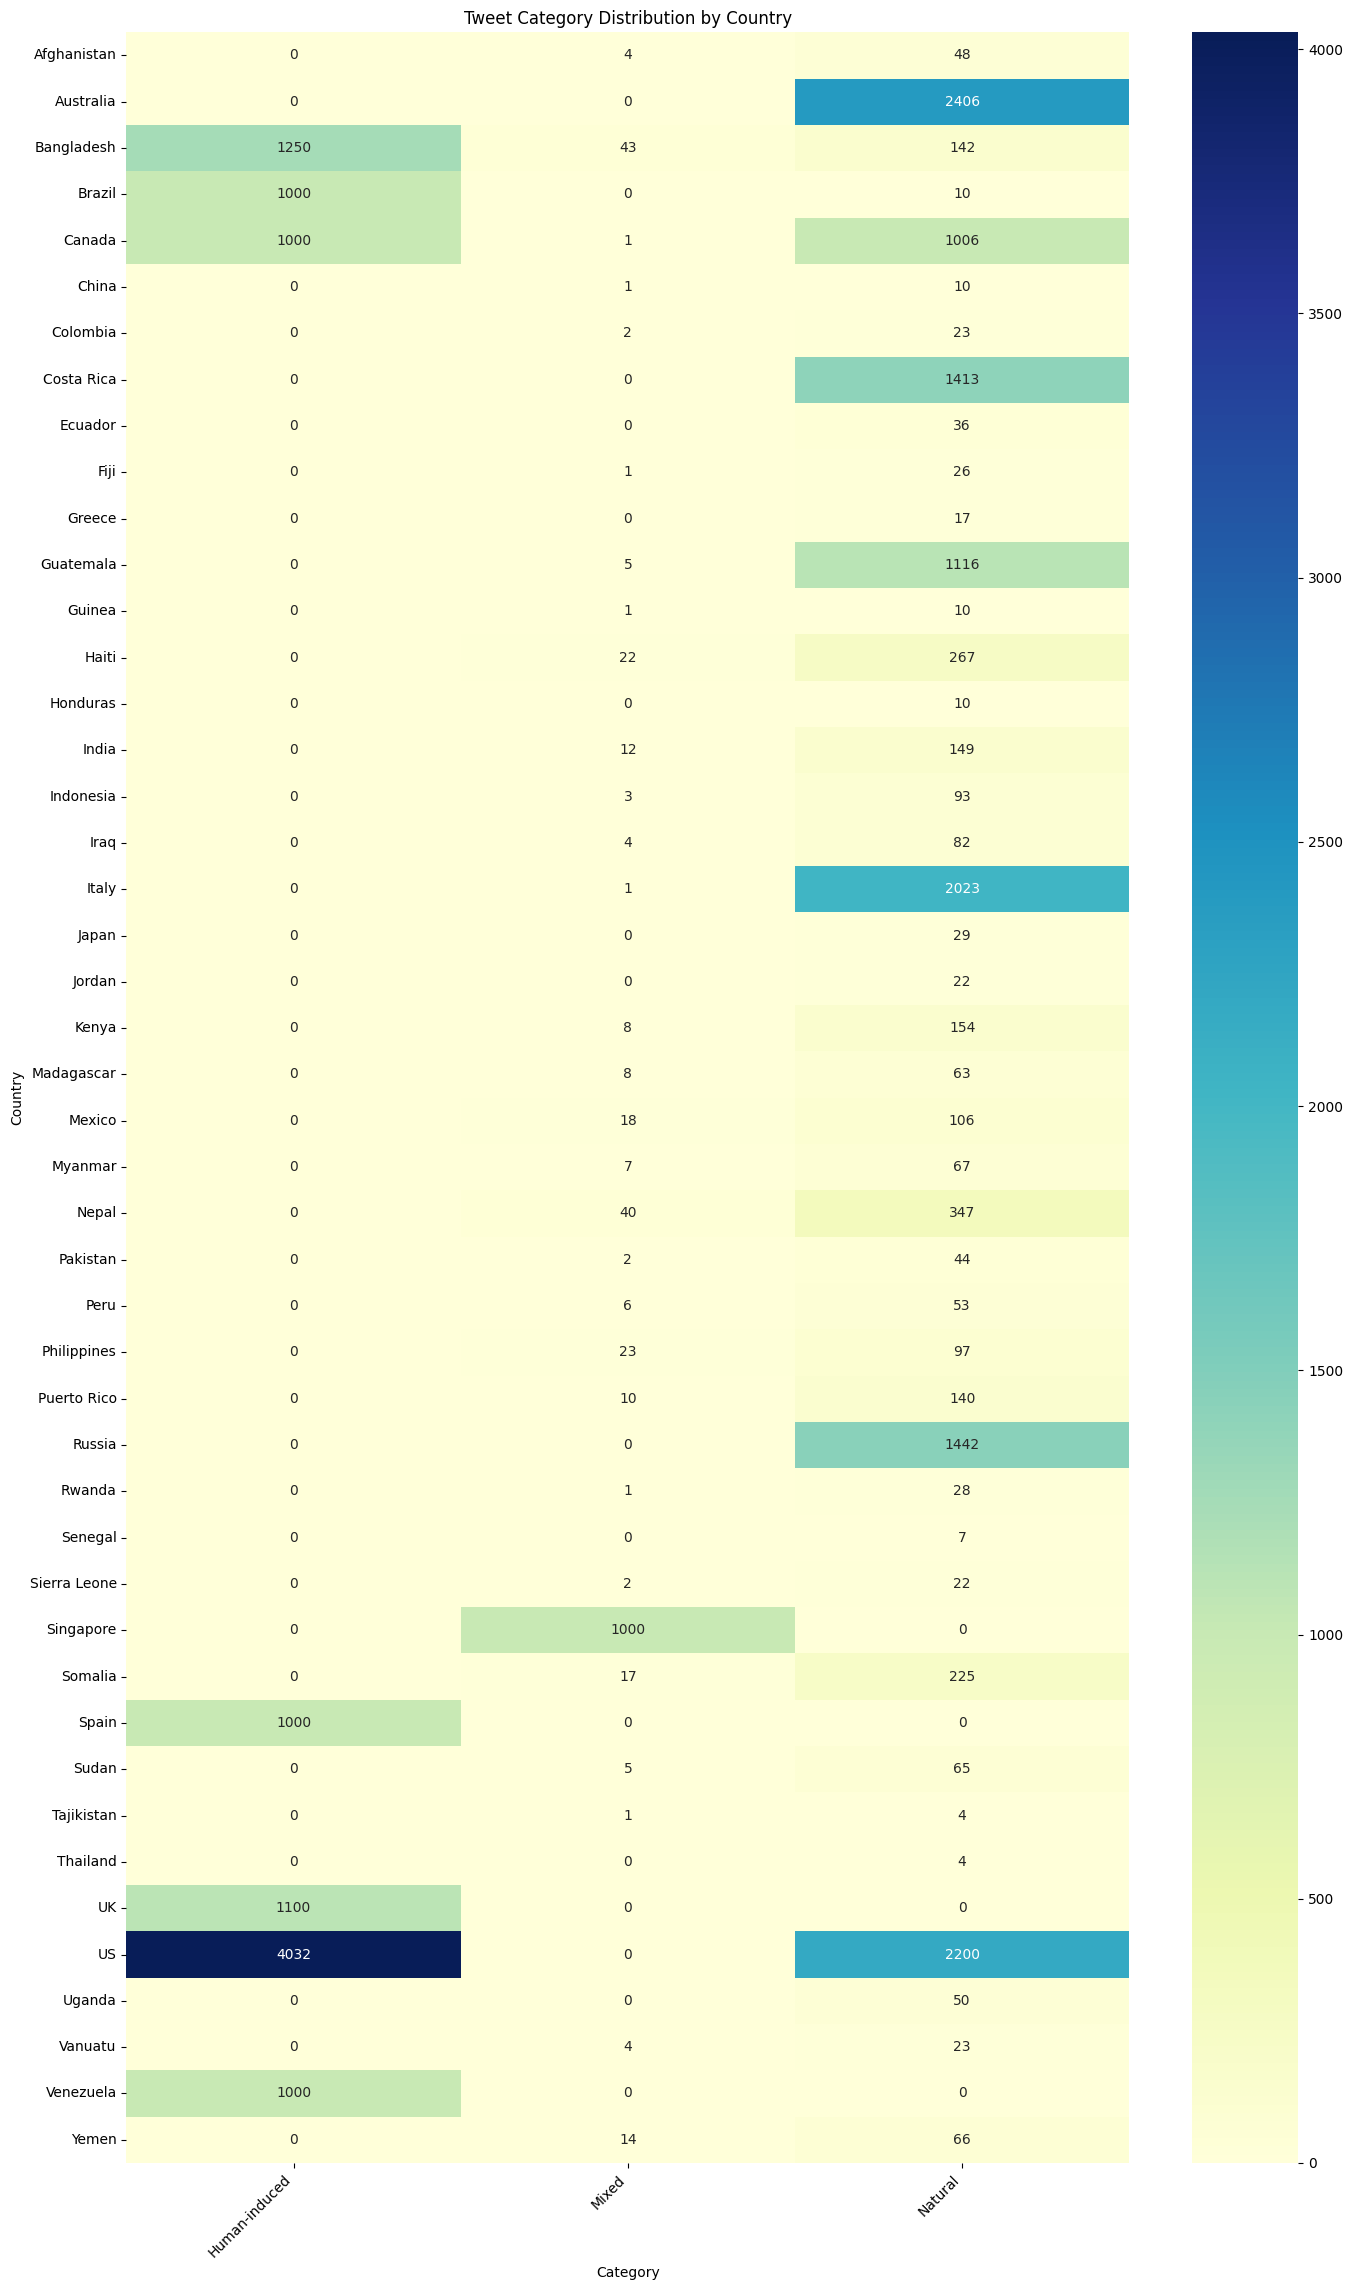

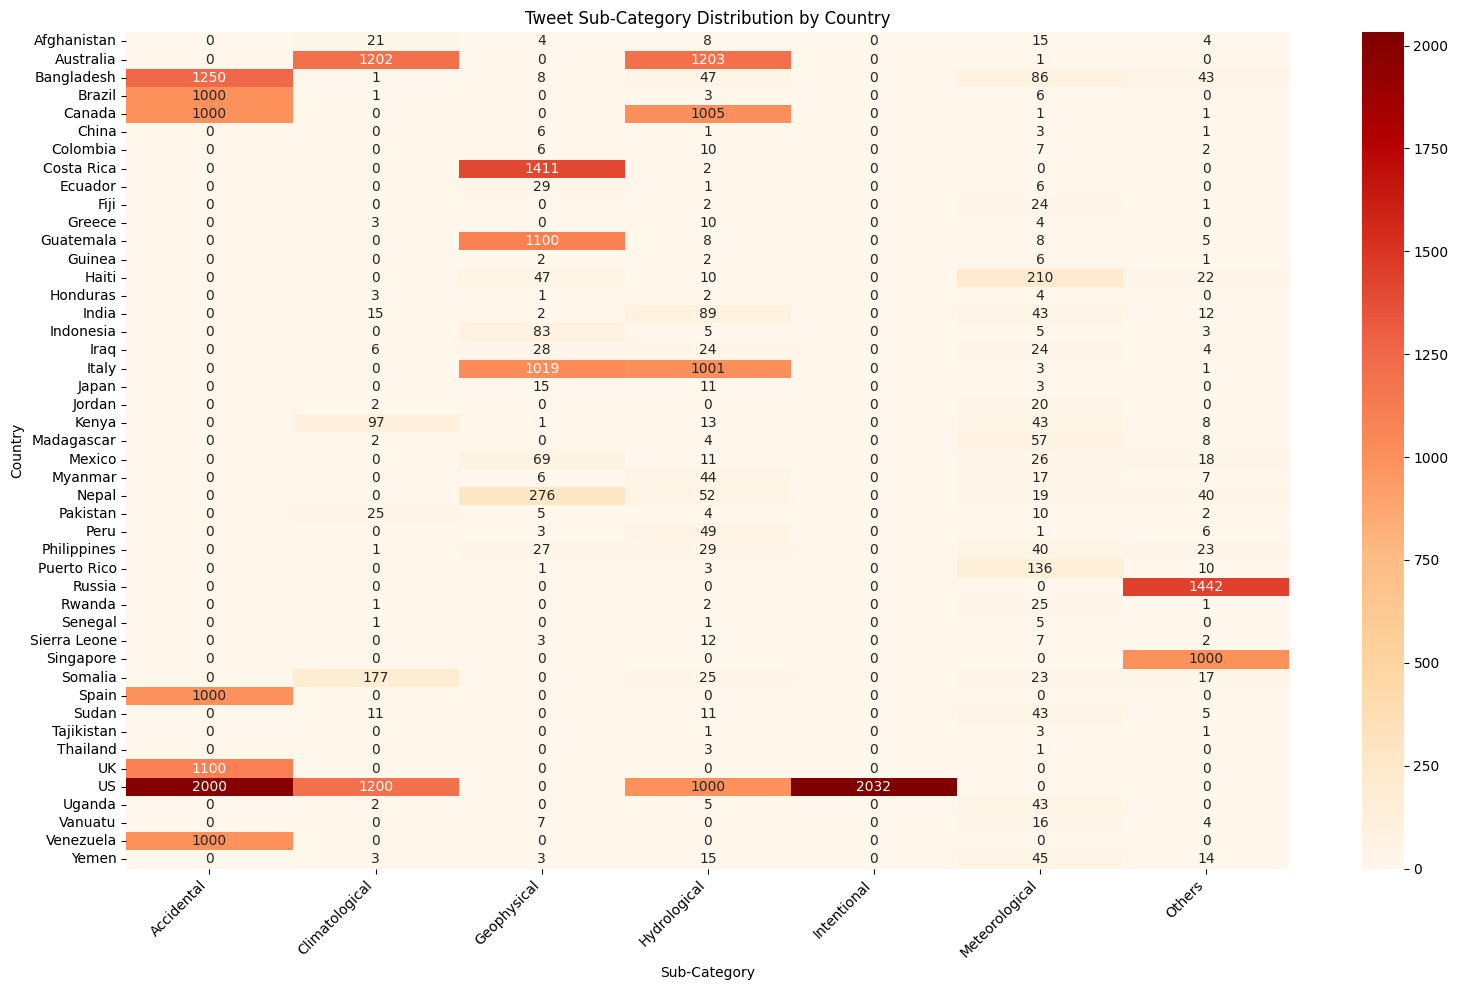


✅ Total Samples per Country (used in model):
Country
US              6232
Australia       2406
Italy           2024
Canada          2007
Russia          1442
Bangladesh      1435
Costa Rica      1413
Guatemala       1121
UK              1100
Brazil          1010
Venezuela       1000
Singapore       1000
Spain           1000
Nepal            387
Haiti            289
Somalia          242
Kenya            162
India            161
Puerto Rico      150
Mexico           124
Philippines      120
Indonesia         96
Iraq              86
Yemen             80
Myanmar           74
Madagascar        71
Sudan             70
Peru              59
Afghanistan       52
Uganda            50
Pakistan          46
Ecuador           36
Japan             29
Rwanda            29
Fiji              27
Vanuatu           27
Colombia          25
Sierra Leone      24
Jordan            22
Greece            17
China             11
Guinea            11
Honduras          10
Senegal            7
Tajikistan         5
T

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


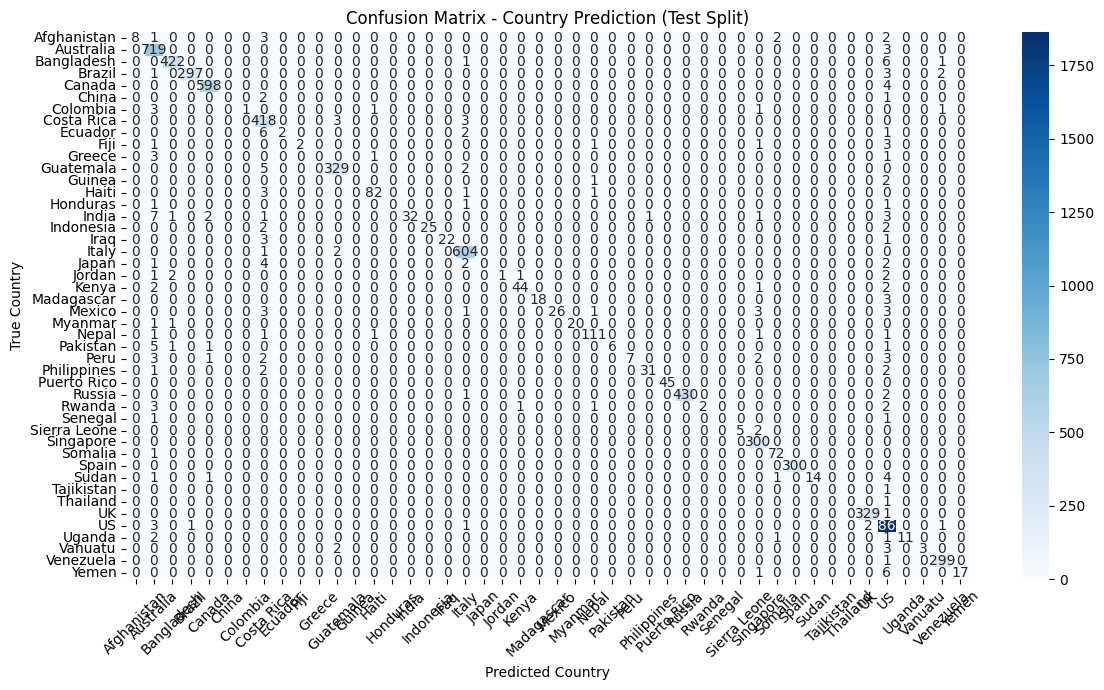

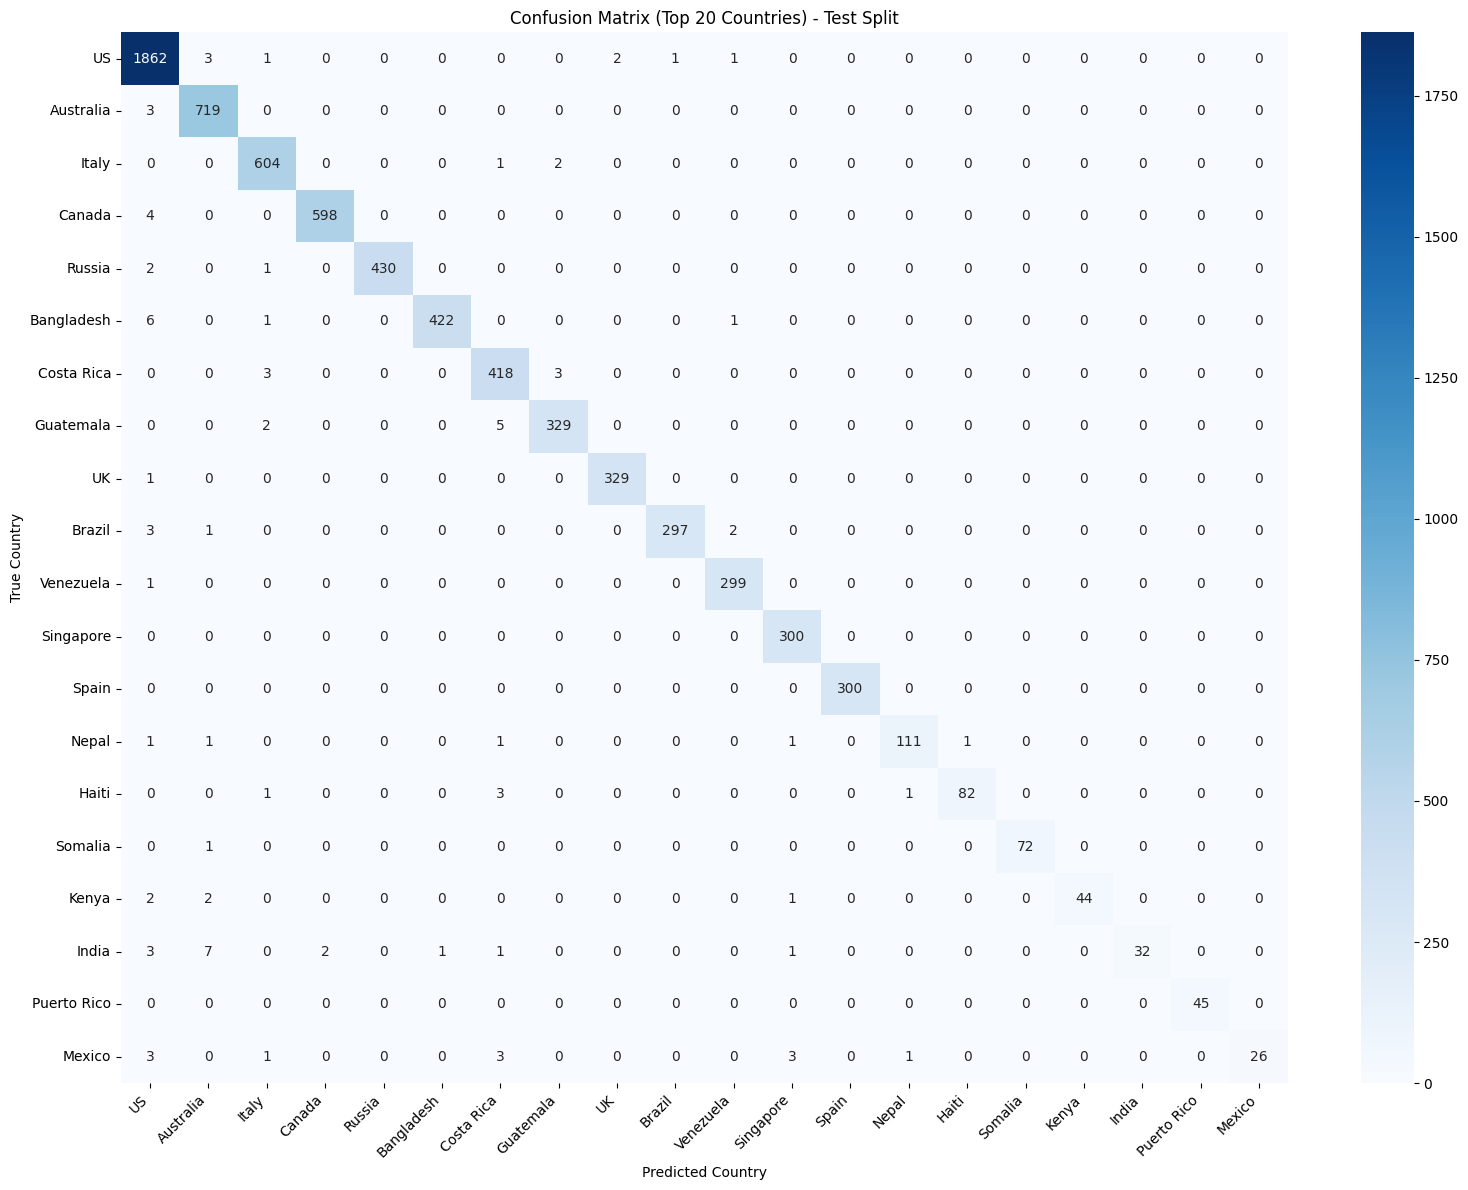


📊 Accuracy (Full Dataset): 0.9802


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------------------
# Step 1: Load and Prepare the Dataset
# --------------------------------------

df = pd.read_csv("Combined_Tweet_Dataset.csv")
# Clean and filter country names
df['Country'] = df['Country'].astype(str).str.strip()

selected_countries = [
    'US', 'Australia', 'Italy', 'Costa Rica', 'Guatemala', 'Philippines',
    'Canada', 'Russia', 'Venezuela', 'Bangladesh', 'Brazil', 'Spain', 'UK', 'Singapore',
    'Afghanistan', 'Belgium', 'China', 'Colombia', 'Ecuador', 'Fiji', 'Greece', 'Guinea', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Japan', 'Jordan', 'Kenya', 'Madagascar',
    'Mexico', 'Myanmar', 'Nepal', 'Netherlands', 'Nigeria', 'Pakistan', 'Peru', 'Puerto Rico',
    'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'Sudan', 'Tajikistan', 'Thailand', 'Uganda', 'Vanuatu', 'Yemen'
]

df = df[df['Country'].isin(selected_countries)]
df = df.dropna(subset=['Category', 'Sub-Category', 'Tweet Text'])

# Clean tweet text
df['Tweet'] = df['Tweet Text'].astype(str).str.strip()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower().strip()

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)

# Combine text + category + sub-category as input features
df['Combined_Text'] = (
    df['Clean_Tweet'] + " " +
    df['Category'].astype(str) + " " +
    df['Sub-Category'].astype(str)
)

# --------------------------------------
# Step 2: Heatmap Visualizations
# --------------------------------------

# Country × Category heatmap

num_countries = len(category_counts.index)
height = max(6, math.ceil(num_countries / 2))  # scale height sensibly

plt.figure(figsize=(14, height))  # Increase height based on number of countries
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Tweet Category Distribution by Country")
plt.xlabel("Category")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Country × Sub-Category heatmap
subcategory_counts = df.groupby(['Country', 'Sub-Category']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(subcategory_counts, annot=True, fmt='d', cmap='OrRd')
plt.title("Tweet Sub-Category Distribution by Country")
plt.xlabel("Sub-Category")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --------------------------------------
# Step 3: Classification Model - Predict Country
# --------------------------------------

# Vectorize combined input
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df['Combined_Text'])

# Encode country labels
le = LabelEncoder()
y = le.fit_transform(df['Country'])

# Show sample counts used in modeling
print("\n✅ Total Samples per Country (used in model):")
print(df['Country'].value_counts())

# Split data for training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Split the dataframe into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Country'], random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# --------------------------------------
# Step 4: Evaluation
# --------------------------------------

# Accuracy on test split
acc_test = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (Test Split): {acc_test:.4f}")

# Classification report
print("\nClassification Report (Test Split):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix (Test Split)
print("\nConfusion Matrix (Test Split):")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Country Prediction (Test Split)")
plt.xlabel("Predicted Country")
plt.ylabel("True Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get top 20 countries from the full dataset
top_countries = df['Country'].value_counts().nlargest(20).index.tolist()

# Create a mask for test set entries that are in the top 20 countries
test_mask = df_test['Country'].isin(top_countries)

# Filter test set
X_test_top = vectorizer.transform(df_test[test_mask]['Combined_Text'])
y_test_top = le.transform(df_test[test_mask]['Country'])

# Predict on filtered test set
y_pred_top = model.predict(X_test_top)

# Confusion matrix for top 20 countries on test set
cm_test_top = confusion_matrix(
    y_test_top,
    y_pred_top,
    labels=le.transform(top_countries)
)

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(cm_test_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_countries, yticklabels=top_countries)
plt.title("Confusion Matrix (Top 20 Countries) - Test Split")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Predicted Country")
plt.ylabel("True Country")
plt.tight_layout()
plt.show()

# --------------------------------------
# Step 5: Accuracy on Full Data
# --------------------------------------

# Predict on all data
y_full_pred = model.predict(X)
acc_full = accuracy_score(y, y_full_pred)

print(f"\n📊 Accuracy (Full Dataset): {acc_full:.4f}")


